# Business Understanding

## Project Domain

Domain proyek ini berada pada bidang lingkungan hidup, khususnya pemantauan kualitas udara di wilayah perkotaan.

Salah satu masalah lingkungan di Jakarta adalah kualitas Udara nya, yang berdampak langsung pada kesehatan masyarakat, produktivitas, dan keberlanjutan lingkungan.  Jakarta adalah salah satu kota dengan tingkat polusi tertinggi di Indonesia karena banyaknya penduduk,kendaraan, pembangunan infrastruktur, aktivitas industri, dan iklim.  Kondisi ini membutuhkan sistem prediksi dan pemantauan kualitas udara yang cepat, akurat, dan mudah dipahami oleh masyarakat dan pemerintah.Klasifikasi kualitas udara dapat dilakukan secara lebih akurat, cepat, dan otomatis menggunakan machine learning dengan metode seperti Random Forest.

## Problem Statements

a. Data kualitas udara yang terdapat di dalam dataset adalah data mentah per hari dari beberapa stasiun pemantau di Jakarta. tetapi data tersebut tidak memberikan informasi langsung tentang kategori ISPU yang mudah dipahami masyarakat dan pemerintah.

b. Tidak ada metode prediksi atau klasifikasi otomatis yang dapat membantu pemerintah dan masyarakat melacak kualitas udara secara cepat dan akurat.

c. Data kualitas Udara di Jakarta yang sangat kompleks terdiri dari ribuan baris tidak memberikan informasi langsung yang dapat digunakan untuk menentukan kategori kualitas udara secara cepat dan akurat.

d.  Sistem prediksi kualitas udara yang akurat sangat penting bagi masyarakat dan pemerintah.

## Goals


a. membangun sistem klasifikasi yang dapat menentukan kategori kualitas udara (baik,sedang,tidak sehat,sangat tidak sehat) berdasarkan parameter seperti PM10, SO2, CO, O3, dan NO2.

 b. mengembangkan model machine learning yang akurat, cepat, dan stabil untuk mendukung proses pemantauan kualitas udara di Jakarta dengan menggunakan algoritma Random Forest

c. Meningkatkan produktivitas dan efisiensi pengawasan kualitas udara dengan menggantikan proses manual menjadi sistem otomatis berbasis data

d. Memanfaatkan model machine learning sebagai alat bantu analisis berbasis data untuk meningkatkan efisiensi proses pemantauan kualitas udara.

## Solution Statements

a. Menggunakan parameter PM10, SO2, CO, O3, dan NO2 sebagai fitur input, aplikasi akan mempelajari pola hubungan antar parameter untuk mengidentifikasi kategori ISPU secara otomatis.

b. Untuk menghasilkan prediksi kategori kualitas udara yang akurat, pemodelan dilakukan menggunakan algoritma Random Forest.

c. menghasilkan model klasifikasi otomatis yang menggunakan data parameter harian untuk menghasilkan kategori kualitas udara: Baik, Sedang, Tidak Sehat, dan Sangat Tidak Sehat

d. Memproses data secara otomatis untuk data kategorikal

# Data Understanding

## Dataset Description

Dataset ini berasal dari portal satu data Jakarta, yang bersifat open data. Portal satu data ini mengumpulkan data kualitas udara harian dari sejumlah stasiun pemantau kualitas udara (SPKU) di DKI Jakarta, yang mencakup informasi tentang konsentrasi berbagai parameter polutan udara dan kategori kualitas udara (ISPU) selama periode waktu yang berbeda. struktur dataset :

a. periode_data : Menunjukkan tanggal pengambilan data

b. tanggal : Tanggal pengukuran kualitas Udara

c. stasiun : nama stasiun pemantau kualitas Udara

d. pm10 : Konsentrasi partikulat PM10 (µg/m³) 

e. so2 :  Konsentrasi gas Sulfur Dioksida (SO₂)

f. co : Konsentrasi gas Karbon Monoksida (CO), g. o3 : Konsentrasi gas Ozon (O₃)

h. no2 : Konsentrasi gas Nitrogen Dioksida (NO₂)

i. max : Nilai tertinggi dari salah satu polutan pada hari tersebut

j. critical : Jenis polutan yang menjadi penentu kualitas udara hari itu

k. categori : Kategori kualitas udara berdasarkan ISPU (baik,sedang, dll)


Link Dataset: https://satudata.jakarta.go.id/open-data/detail?kategori=dataset&page_url=stasiun-pemantau-kualitas-udara-spku-tahun-2018&data_no=1

Referensi Jurnal: https://ejurnal.unmuhjember.ac.id/index.php/JUSTINDO/article/view/1912/643

Pembuatan dataset untuk modelling dimulai dengan pemuatan data dari file sumber, di mana data awal umumnya berupa campuran tipe data. Tahap pertama yang dilakukan adalah pembersihan tipe data, memastikan semua kolom polutan (seperti PM10, SO2, CO) dikonversi ke format numerik (float), dan kolom tanggal dikonversi ke format datetime. Dalam proses ini, semua nilai data yang tidak valid atau non-numerik secara otomatis diidentifikasi sebagai nilai hilang (NaN). Langkah selanjutnya adalah pemisahan antara fitur dan target. Kolom categori (kualitas udara) dipisahkan sebagai variabel target yang akan diprediksi, sementara kolom polutan dan stasiun menjadi fitur (X). Karena model membutuhkan input numerik, variabel target dikonversi dari kategori teks menjadi angka menggunakan Label Encoding. Setelah pemisahan, fokus beralih ke fitur. Nilai-nilai (NaN) yang muncul akibat proses pembersihan awal harus ditangani melalui imputasi. Nilai hilang pada fitur numerik secara permanen diisi menggunakan nilai rata-rata (mean) dari masing-masing kolom, untuk memastikan dataset tidak memiliki gap yang akan menyebabkan kegagalan pada model. Terakhir, variabel fitur kategorikal seperti stasiun dan critical diubah menjadi format numerik menggunakan One-Hot Encoding. Proses ini menciptakan kolom biner baru untuk setiap nilai unik kategori. Hasil akhir dari proses ini adalah dataset yang terdiri dari angka-angka terstruktur, yang kemudian dibagi menjadi set data pelatihan dan pengujian sebagai persiapan final sebelum dimasukkan ke dalam algoritma model.

## Libary Requirements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [3]:
df = pd.read_csv('spku.csv')

## Exploratory Data Abalysis

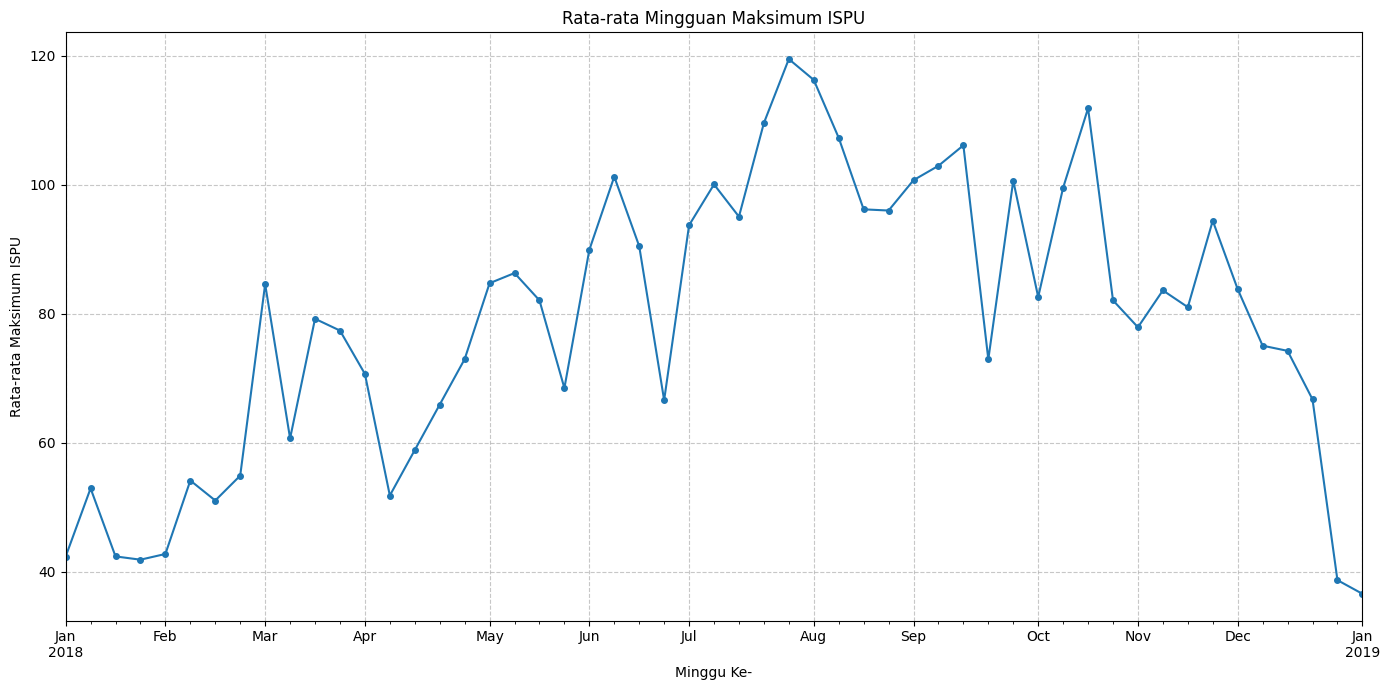

In [5]:
numeric_cols = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['tanggal'] = pd.to_datetime(df['tanggal'])
df_daily_mean = df.groupby('tanggal')[numeric_cols].mean()
date_range = pd.date_range(start=df_daily_mean.index.min(), end=df_daily_mean.index.max(), freq='D')
df_ts_full_index = df_daily_mean.reindex(date_range)
df_ts_interpolated = df_ts_full_index.interpolate(method='linear')
df_max_weekly = df_ts_interpolated['max'].resample('W').mean()

plt.figure(figsize=(14, 7))
df_max_weekly.plot(kind='line', marker='o', markersize=4, linestyle='-')
plt.title('Rata-rata Mingguan Maksimum ISPU')
plt.xlabel('Minggu Ke-')
plt.ylabel('Rata-rata Maksimum ISPU')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plot ini menunjukkan pergerakan Indeks Standar Pencemar Udara (ISPU) mingguan secara keseluruhan. Pada grafik mencerminkan periode kualitas udara yang memburuk dan membaik sepanjang tahun. Adanya puncak yang tinggi menunjukkan ada beberapa minggu di mana kualitas udara rata-rata mencapai tingkat SEDANG atau bahkan TIDAK SEHAT secara signifikan.

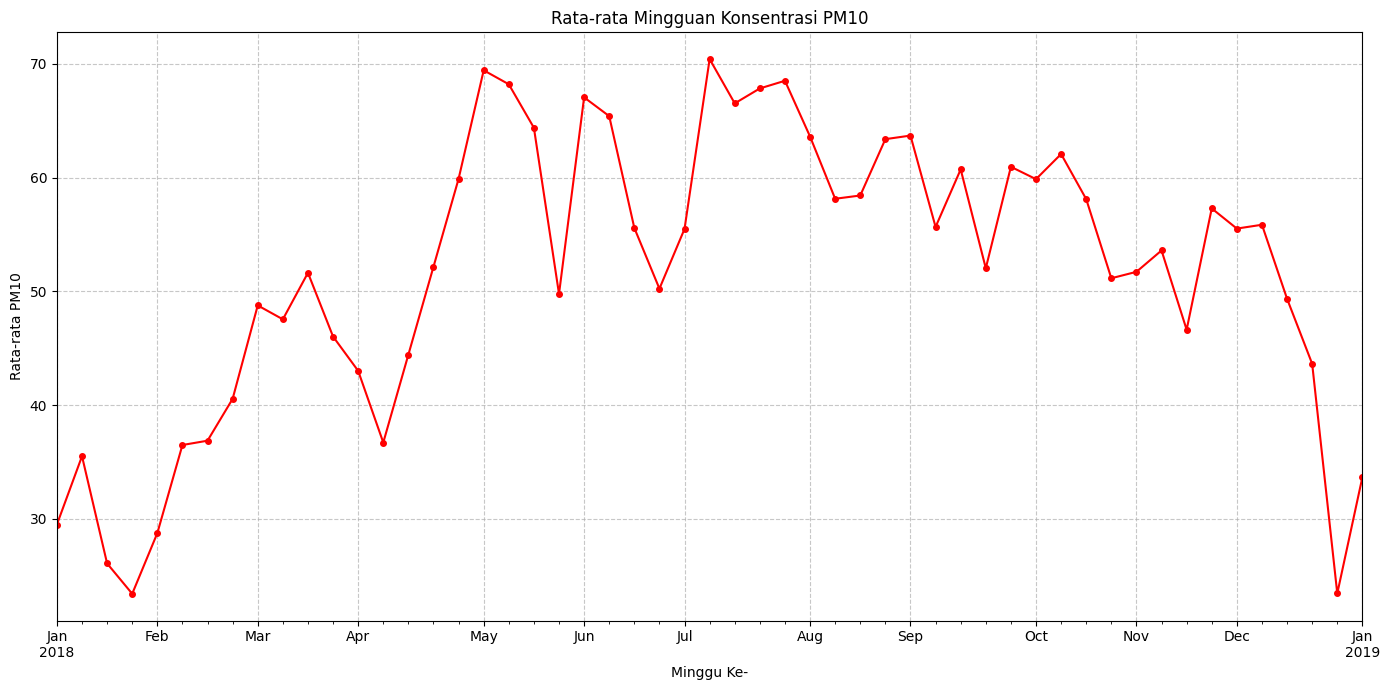

In [15]:
df_pm10_weekly = df_ts_interpolated['pm10'].resample('W').mean()

plt.figure(figsize=(14, 7))
df_pm10_weekly.plot(kind='line', color='red', marker='o', markersize=4, linestyle='-')
plt.title('Rata-rata Mingguan Konsentrasi PM10')
plt.xlabel('Minggu Ke-')
plt.ylabel('Rata-rata PM10')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Grafik ini memvisualisasikan tren rata-rata mingguan konsentrasi partikel halus PM10. Umumnya, tren PM10 seringkali berkorelasi positif dengan tren ISPU Maksimum. Puncak yang tinggi pada PM10 menunjukkan tingginya konsentrasi partikel yang dapat dihirup, mengindikasikan bahwa PM10 kemungkinan merupakan polutan kritis utama yang mendorong nilai ISPU menjadi tinggi.

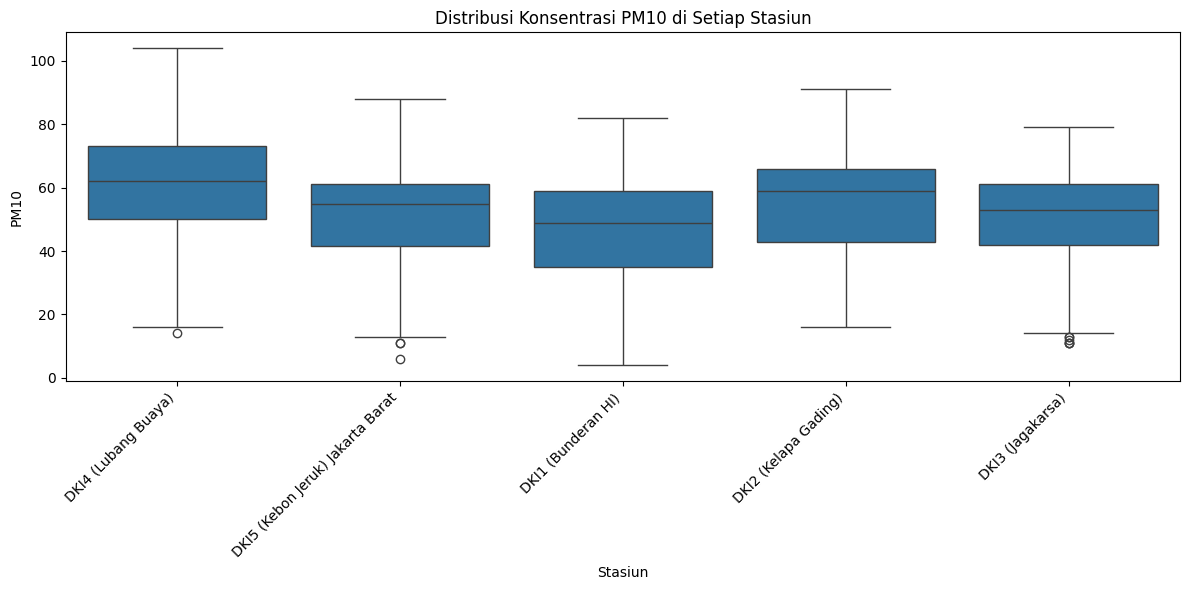

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='stasiun', y='pm10', data=df.dropna(subset=['pm10']))
plt.title('Distribusi Konsentrasi PM10 di Setiap Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('PM10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Plot ini menampilkan perbandingan konsentrasi PM10 antar stasiun. Stasiun dengan median tertinggi adalah lokasi dengan konsentrasi PM10 rata-rata tertinggi. Kotak yang lebih panjang menunjukkan variabilitas PM10 yang lebih besar dari waktu ke waktu di stasiun tersebut.

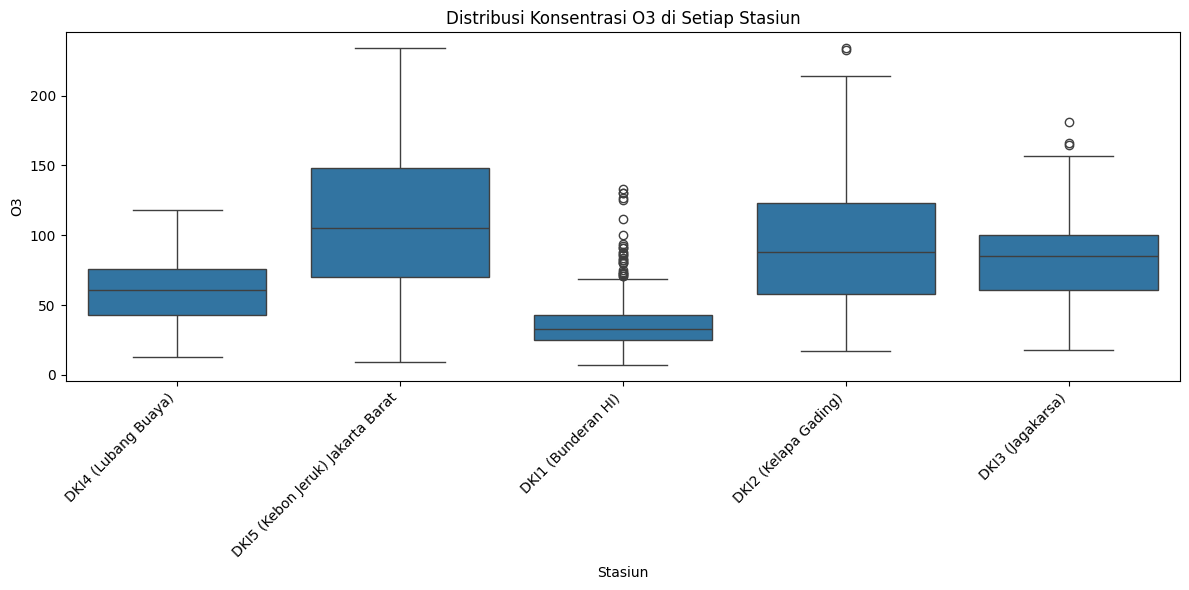

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='stasiun', y='o3', data=df.dropna(subset=['o3']))
plt.title('Distribusi Konsentrasi O3 di Setiap Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('O3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Plot ini menampilkan distribusi Ozon O3. Berbeda dengan PM10, ozon adalah polutan sekunder (terbentuk dari reaksi polutan lain di bawah sinar matahari). Stasiun dengan median O3 yang tinggi berada di area yang memiliki banyak prekursor O3 (seperti NOx dan VOC) atau kondisi meteorologi yang ideal untuk pembentukannya. Perbedaan distribusi yang signifikan antar stasiun menunjukkan adanya variasi geografis dan aktivitas yang memengaruhi pembentukan O3.

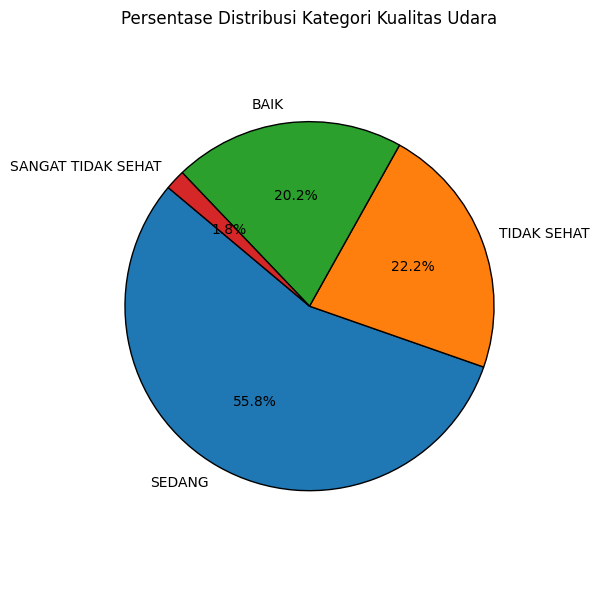

In [22]:
category_counts = df['categori'].value_counts()
category_counts_filtered = category_counts[category_counts.index != 'TIDAK ADA DATA']

plt.figure(figsize=(6, 6))
plt.pie(category_counts_filtered, labels=category_counts_filtered.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Persentase Distribusi Kategori Kualitas Udara')
plt.axis('equal')
plt.tight_layout()
plt.show()

Diagram ini menunjukkan seberapa sering kualitas udara terukur masuk ke dalam kategori tertentu. Dominasi kategori SEDANG memiliki nilai 58% menunjukkan bahwa sebagian besar waktu, kualitas udara berada pada tingkat yang masih dapat diterima.

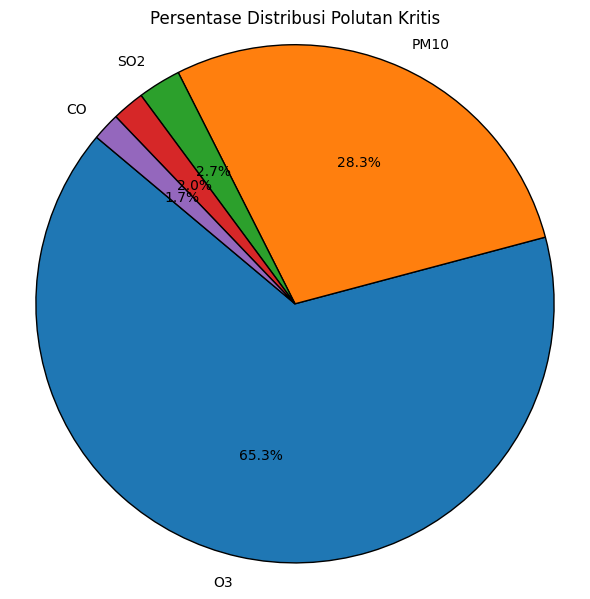

In [24]:
critical_counts = df['critical'].value_counts()
critical_counts_filtered = critical_counts[critical_counts.index != 'TIDAK ADA DATA']

plt.figure(figsize=(6, 6))
plt.pie(critical_counts_filtered, labels=critical_counts_filtered.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Persentase Distribusi Polutan Kritis')
plt.axis('equal')
plt.tight_layout()
plt.show()

Diagram ini menunjukkan polutan mana yang paling sering menjadi faktor penentu buruknya kualitas udara (yaitu, polutan dengan nilai ISPU tertinggi pada hari tertentu). Dominasi O3 dan PM10 menegaskan bahwa kedua polutan inilah yang harus menjadi fokus utama dalam upaya mitigasi polusi di wilayah tersebut.

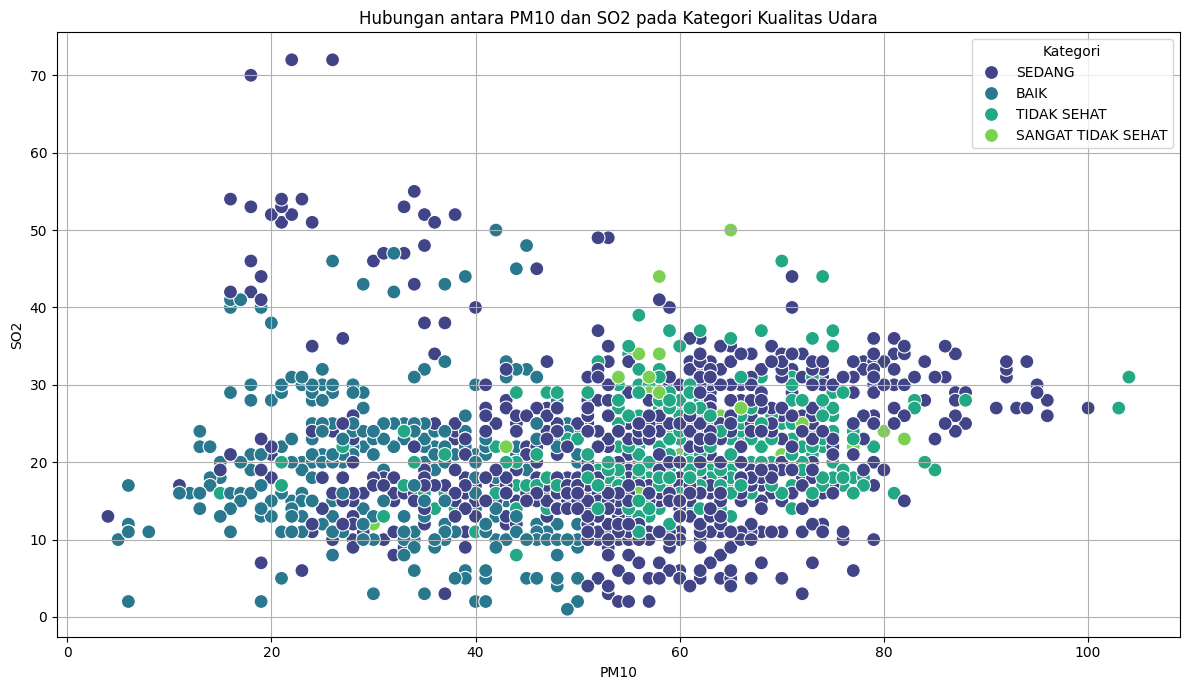

In [29]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='pm10',
    y='so2',
    data=df.dropna(subset=['pm10', 'so2', 'categori']),
    hue='categori',
    palette='viridis',
    s=100 
)
plt.title('Hubungan antara PM10 dan SO2 pada Kategori Kualitas Udara')
plt.xlabel('PM10')
plt.ylabel('SO2')
plt.grid(True)
plt.legend(title='Kategori', loc='upper right')
plt.tight_layout()
plt.show()

Plot di atas menunjukkan hubungan antara nilai PM10 (partikulat kasar) dan SO₂ (sulfur dioksida) pada berbagai kategori kualitas udara. Setiap titik mewakili satu pengamatan, dan warna titik menunjukkan kategori kualitas udara seperti BAIK, SEDANG, TIDAK SEHAT, dan SANGAT TIDAK SEHAT.

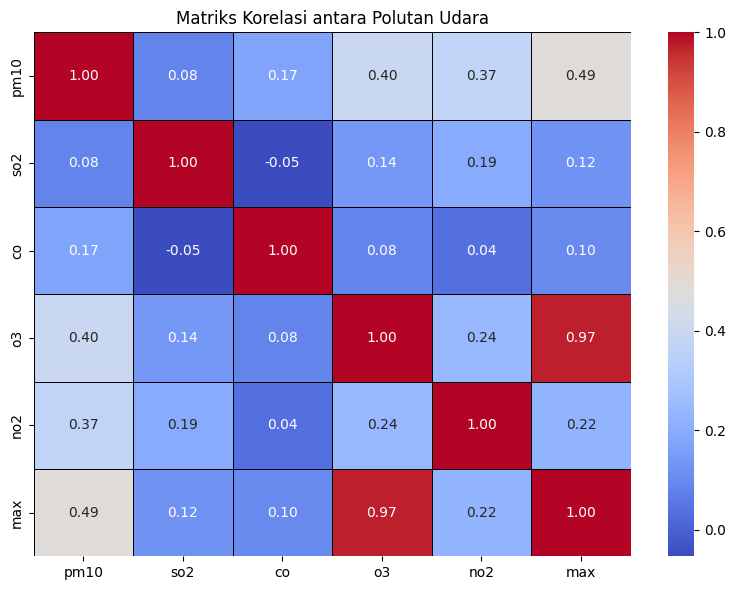

In [7]:
corr_data = df[['pm10', 'so2', 'co', 'o3', 'no2', 'max']].copy()
correlation_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Matriks Korelasi antara Polutan Udara')
plt.tight_layout()
plt.show()

Matriks ini menunjukkan korelasi pertemuan antara baris y dan kolom x. Angka di dalam kotak menunjukkan koefisien korelasi; semakin mendekati 1, semakin kuat pengaruh antar kedua polutan tersebut.

# Data Preparation

## Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   periode_data  1675 non-null   int64 
 1   tanggal       1675 non-null   object
 2   stasiun       1675 non-null   object
 3   pm10          1675 non-null   object
 4   so2           1675 non-null   object
 5   co            1675 non-null   object
 6   o3            1675 non-null   object
 7   no2           1675 non-null   object
 8   max           1675 non-null   object
 9   critical      1675 non-null   object
 10  categori      1675 non-null   object
dtypes: int64(1), object(10)
memory usage: 144.1+ KB


## Dataset Transformation

Langkah pertama dataset ditransformasikan sebelum diolah ke model ML adalah Imputasi Nilai Hilang. Karena model Machine Learning tidak dapat memproses (NaN), nilai yang hilang pada semua fitur numerik  (PM10, SO2, CO, dll.) harus diisi. Dalam konteks ini, imputasi dilakukan secara sistematis dengan mengganti (NaN) dengan nilai statistik representatif dari kolom tersebut, seperti nilai rata-rata (mean).  
Selanjutnya, semua informasi tekstual harus diubah menjadi angka. Transformasi ini dikenal sebagai Encoding. Variabel target, yaitu kolom categori (misalnya, 'BAIK', 'SEDANG'), diubah menjadi urutan angka integer (0, 1, 2, ...) melalui Label Encoding. Sementara itu, fitur kategorikal sisa, seperti stasiun atau critical (polutan kritis), diubah menjadi format biner melalui One-Hot Encoding. Proses ini menciptakan serangkaian kolom baru yang hanya berisi nilai 0 atau 1, memungkinkan model untuk memahami perbedaan kategori tanpa mengasumsikan adanya urutan (ordinalitas). Transformasi berakhir dengan pembagian data menjadi set pelatihan (training set) dan set pengujian (testing set). Pembagian ini merupakan langkah kritis untuk memastikan evaluasi model dilakukan secara objektif pada data yang belum pernah dilihat sebelumnya. Setelah semua transformasi ini selesai, dataset yang dihasilkan sepenuhnya numerik, bersih, dan siap untuk memulai fase pelatihan model.

In [4]:
df.replace('---', pd.NA, inplace=True)

In [5]:
df = df.replace({pd.NA: np.nan})

In [6]:
num_cols = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']

In [7]:
cat_cols = ['stasiun', 'critical', 'categori']

In [8]:
for col in num_cols:
	df[col] = pd.to_numeric(df[col], errors='coerce')

num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [9]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [10]:
df = df[df['categori'] != 'TIDAK ADA DATA']

In [11]:
le = LabelEncoder()
df['categori_encoded'] = le.fit_transform(df['categori'])

In [12]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'BAIK': np.int64(0), 'SANGAT TIDAK SEHAT': np.int64(1), 'SEDANG': np.int64(2), 'TIDAK SEHAT': np.int64(3)}


## Determine Variabels

In [13]:
X = df[['pm10', 'so2', 'co', 'o3', 'no2']]
y = df['categori_encoded']

In [14]:
df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,categori_encoded
0,201801,2018-01-08,DKI4 (Lubang Buaya),62.0,32.0,16.0,48.0,6.0,62.0,PM10,SEDANG,2
1,201801,2018-01-09,DKI4 (Lubang Buaya),45.0,32.0,11.0,37.0,7.0,45.0,PM10,BAIK,0
2,201801,2018-01-10,DKI4 (Lubang Buaya),36.0,34.0,12.0,55.0,9.0,55.0,O3,SEDANG,2
3,201801,2018-01-11,DKI4 (Lubang Buaya),37.0,38.0,9.0,43.0,7.0,43.0,O3,BAIK,0
4,201801,2018-01-12,DKI4 (Lubang Buaya),37.0,33.0,13.0,47.0,9.0,47.0,O3,BAIK,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, 
    random_state=42, 
    stratify=y  
)

In [16]:
df.to_csv('SPKU_final.csv', index=False)

# Modeling

## Modeling classification / clustering

In [16]:
rf = RandomForestClassifier(
    n_estimators=100,  
    criterion='gini',   
    random_state=42
)

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf.predict(X_test)

# Evaluation

## Model evaluation classification / clustering

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.48%


Model memiliki kinerja sangat baik dan mampu memprediksi kategori kualitas udara dengan benar 98% dari waktu yang ada pada data pengujian.

In [20]:
target_names = [str(cls) for cls in le.fit_transform (le.classes_)]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        67
           1       1.00      1.00      1.00         6
           2       0.97      1.00      0.99       183
           3       1.00      1.00      1.00        73

    accuracy                           0.98       329
   macro avg       0.99      0.98      0.99       329
weighted avg       0.99      0.98      0.98       329



Support: Menunjukkan jumlah sampel aktual untuk setiap kelas dalam set pengujian. Terlihat adanya ketidakseimbangan kelas (misalnya, Kelas 2 adalah kelas mayoritas dengan 183 sampel, sementara Kelas 1 adalah kelas minoritas dengan hanya 6 sampel). 

Precision: Menunjukkan dari semua prediksi model untuk kelas tertentu, berapa banyak yang benar. Nilai yang mendekati 1.00 di sebagian besar kelas menunjukkan model Anda sangat baik dalam menghindari False Positives (tidak salah mengklasifikasikan kelas lain sebagai kelas tersebut). Hanya Kelas 2 yang sedikit lebih rendah (0.97).

Recall: Menunjukkan dari semua sampel aktual dalam kelas tertentu, berapa banyak yang berhasil diprediksi oleh model.Nilai yang mendekati 1.00 di sebagian besar kelas menunjukkan model Anda sangat baik dalam menghindari False Negatives (tidak gagal mendeteksi kelas tersebut). Pengecualian adalah Kelas 0 (0.93), yang berarti 7% dari sampel Kelas 0 salah diklasifikasikan sebagai kelas lain.

F1-Score: Merupakan rata-rata harmonik dari Precision dan Recall. F1-Score yang tinggi (0.99 hingga 1.00) di sebagian besar kelas menegaskan bahwa model memiliki keseimbangan yang sangat baik antara presisi dan sensitivitas.

Rata-rata (Averages)Macro Avg (Rata-rata Makro): 0.99Ini adalah rata-rata sederhana dari metrik (Precision, Recall, F1) di semua kelas, memberikan bobot yang sama untuk setiap kelas. Nilai 0.99 yang sangat tinggi mengkonfirmasi kinerja model yang kuat bahkan pada kelas minoritas.Weighted Avg (Rata-rata Berbobot): 0.98Ini adalah rata-rata yang dibobot berdasarkan jumlah support setiap kelas. Nilai ini sangat mendekati Akurasi (0.9848), yang menunjukkan bahwa kinerja Akurasi tinggi model Anda memang valid dan didukung oleh kinerja yang kuat di kelas mayoritas.

In [23]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 62   0   5   0]
 [  0   6   0   0]
 [  0   0 183   0]
 [  0   0   0  73]]


Baris (Horizontal): Nilai Aktual kelas sebenarnya dari data pengujian, (y_test).

Kolom (Vertikal): Nilai Prediksi kelas yang diprediksi oleh model, (y_pred).

Diagonal Utama: True Positives (TP), yaitu jumlah prediksi yang benar oleh model.

Off-Diagonal: Kesalahan Klasifikasi, di mana model salah memprediksi kelas.

# Deployment

## Model Simulation

In [ ]:
def simulasi_prediksi():

    print("SIMULASI PREDIKSI KUALITAS UDARA")
    
    try:
        pm10 = float(input("PM10 (µg/m³)  : "))
        so2 = float(input("SO2 (µg/m³)   : "))
        co = float(input("CO (µg/m³)    : "))
        o3 = float(input("O3 (µg/m³)    : "))
        no2 = float(input("NO2 (µg/m³)   : "))
      
        data_baru = pd.DataFrame({
            'pm10': [pm10],
            'so2': [so2],
            'co': [co],
            'o3': [o3],
            'no2': [no2]
        })
        
        prediksi_encoded = rf.predict(data_baru)[0]
        prediksi_label = le.inverse_transform([prediksi_encoded])[0]
        
        nilai_max = data_baru.values[0].max()
        polutan_names = ['PM10', 'SO2', 'CO', 'O3', 'NO2']
        polutan_kritis = polutan_names[data_baru.values[0].argmax()]
        
        print("HASIL PREDIKSI")
        print(f"\nKategori Kualitas Udara : {prediksi_label}")
        print(f"Kategori Encoded        : {prediksi_encoded}")
        print(f"Nilai Maksimum          : {nilai_max} µg/m³")
        print(f"Polutan Kritis          : {polutan_kritis}")

    except ValueError:
        print("\n✗ Error: Masukkan angka yang valid!")
    except Exception as e:
        print(f"\n✗ Error: {str(e)}")

simulasi_prediksi()

SIMULASI PREDIKSI KUALITAS UDARA

Masukkan nilai parameter kualitas udara:
HASIL PREDIKSI

Kategori Kualitas Udara : SEDANG
Kategori Encoded        : 2
Nilai Maksimum          : 91.0 µg/m³
Polutan Kritis          : NO2


## Save Model

In [29]:
model = 'kualitas_model.joblib'
encoder = 'kualitas_encoder.joblib'
joblib.dump(rf, model)
joblib.dump(le, encoder)

print(f"Model berhasil disimpan sebagai: {model}")
print(f"Label Encoder berhasil disimpan sebagai: {encoder}")

Model berhasil disimpan sebagai: kualitas_model.joblib
Label Encoder berhasil disimpan sebagai: kualitas_encoder.joblib
